In [1]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#importing datasets
df_2001_2004 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
df_2001_2004_theft_x = df_2001_2004.loc[:, ['Primary Type','Description','Location Description','Arrest', 'Ward', ]]
    
)
    test_df_x = test_df.loc[:,['PassengerId', 'Pclass', 'Age', 'SibSp','Parch', 'Fare','Sex']]

b'Skipping line 1513591: expected 23 fields, saw 24\n'


C:\Users\chaos\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df_2001_2004.head()

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01 00:01:00,879,4786321,HM399414,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2003-03-01 00:00:00,2544,4676906,HM278933,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2004-06-20 11:00:00,2919,4789749,HM402220,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2004-12-30 20:00:00,2927,4789765,HM402058,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2003-05-01 01:00:00,3302,4677901,HM275615,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [4]:
df_2001_2004.shape

(1923515, 23)

In [5]:
df_2001_2004.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Year,Longitude
count,1.923515e+06,1.923515e+06,1.923515e+06,1.923513e+06,1.223383e+06,1.223268e+06,1.892824e+06,1.923515e+06,1.892823e+06
mean,4.455517e+06,2.450314e+06,1.217773e+03,1.134669e+01,2.246317e+01,3.725664e+01,1.164549e+06,2.002354e+03,-8.767167e+01
std,6.692676e+05,7.662898e+05,7.086507e+02,6.977792e+00,1.392668e+01,2.146987e+01,1.617451e+04,1.795053e+00,5.880068e-02
min,8.790000e+02,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.178983e+01,-9.168657e+01
25%,3.931944e+06,1.819338e+06,6.240000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153269e+06,2.001000e+03,-8.771252e+01
50%,4.475318e+06,2.414899e+06,1.114000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165916e+06,2.002000e+03,-8.766638e+01
75%,4.957632e+06,3.017702e+06,1.813000e+03,1.700000e+01,3.300000e+01,5.600000e+01,1.176269e+06,2.003000e+03,-8.762885e+01
max,6.254041e+06,1.081375e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,2.004000e+03,-8.752453e+01


In [6]:
df_2001_2004.groupby(['Primary Type','Arrest']).count()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Unnamed: 0</th>
      <th>ID</th>
      <th>Case Number</th>
      <th>Date</th>
      <th>Block</th>
      <th>IUCR</th>
      <th>Description</th>
      <th>Location Description</th>
      <th>Domestic</th>
      <th>Beat</th>
      <th>...</th>
      <th>Ward</th>
      <th>Community Area</th>
      <th>FBI Code</th>
      <th>X Coordinate</th>
      <th>Y Coordinate</th>
      <th>Year</th>
      <th>Updated On</th>
      <th>Latitude</th>
      <th>Longitude</th>
      <th>Location</th>
    </tr>
    <tr>
      <th>Primary Type</th>
      <th>Arrest</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">ARSON</th>
      <th>False</th>
      <td>3230</td>
      <td>3230</td>
      <td>3230</td>
      <td>3230</td>
      <td>3230</td>
      <td>3230</td>
      <td>3230</td>
      <td>3230</td>
      <td>3230</td>
      <td>3230</td>
      <td>...</td>
      <td>1991</td>
      <td>1991</td>
      <td>3230</td>
      <td>3154</td>
      <td>3154</td>
      <td>3230</td>
      <td>3230</td>
      <td>3154</td>
      <td>3154</td>
      <td>3154</td>
    </tr>
    <tr>
      <th>True</th>
      <td>598</td>
      <td>598</td>
      <td>598</td>
      <td>598</td>
      <td>598</td>
      <td>598</td>
      <td>598</td>
      <td>598</td>
      <td>598</td>
      <td>598</td>
      <td>...</td>
      <td>346</td>
      <td>346</td>
      <td>598</td>
      <td>593</td>
      <td>593</td>
      <td>598</td>
      <td>598</td>
      <td>593</td>
      <td>593</td>
      <td>593</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">ASSAULT</th>
      <th>False</th>
      <td>92918</td>
      <td>92918</td>
      <td>92918</td>
      <td>92918</td>
      <td>92918</td>
      <td>92918</td>
      <td>92918</td>
      <td>92917</td>
      <td>92918</td>
      <td>92918</td>
      <td>...</td>
      <td>58212</td>
      <td>58199</td>
      <td>92918</td>
      <td>91785</td>
      <td>91785</td>
      <td>92918</td>
      <td>92918</td>
      <td>91785</td>
      <td>91785</td>
      <td>91785</td>
    </tr>
    <tr>
      <th>True</th>
      <td>28499</td>
      <td>28499</td>
      <td>28499</td>
      <td>28499</td>
      <td>28499</td>
      <td>28499</td>
      <td>28499</td>
      <td>28499</td>
      <td>28499</td>
      <td>28499</td>
      <td>...</td>
      <td>18030</td>
      <td>18029</td>
      <td>28499</td>
      <td>28124</td>
      <td>28124</td>
      <td>28499</td>
      <td>28499</td>
      <td>28124</td>
      <td>28124</td>
      <td>28124</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">BATTERY</th>
      <th>False</th>
      <td>280486</td>
      <td>280486</td>
      <td>280486</td>
      <td>280486</td>
      <td>280486</td>
      <td>280486</td>
      <td>280486</td>
      <td>280485</td>
      <td>280486</td>
      <td>280486</td>
      <td>...</td>
      <td>176171</td>
      <td>176144</td>
      <td>280486</td>
      <td>277106</td>
      <td>277106</td>
      <td>280486</td>
      <td>280486</td>
      <td>277106</td>
      <td>277106</td>
      <td>277106</td>
    </tr>
    <tr>
      <th>True</th>
      <td>83052</td>
      <td>83052</td>
      <td>83052</td>
      <td>83052</td>
      <td>83052</td>
      <td>83052</td>
      <td>83052</td>
      <td>83052</td>
      <td>83052

In [8]:
df_2001_2004['Description'].count()

1923515

In [9]:
df_2001_2004['Date'] = pd.to_datetime(df_2001_2004['Date'])

In [10]:
df_2001_2004.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,2004-01-01 00:01:00,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,2004-06-20 11:00:00,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,2004-12-30 20:00:00,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [12]:
df_2001_2004 = df_2001_2004.set_index(['Date'])
#df_2001_2004 = df_2001_2004.set_index(['Primary Type'])
df_2001_2004.loc['2004-01-01':'2004-12-31']

KeyError: 'Date'

Text(0,0.5,'Total')

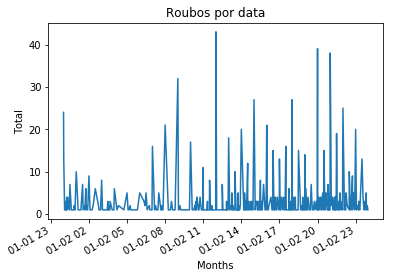

In [ ]:
#quebra por mes; 
df_by_year = df_2001_2004.loc['2004-01-02':'2004-01-02']
Roubos_by_data = df_by_year.groupby(['Date']).size()
Roubos_by_data
plot_by_month = Roubos_by_data.plot(title='Roubos por data')
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total')

In [ ]:
#quebra por dia
# By Day
sales_by_day = df.groupby('Day').size()
plot_by_day = sales_by_day.plot(title='Daily Sales',xticks=(range(1,31)),rot=55)
plot_by_day.set_xlabel('Day')
plot_by_day.set_ylabel('Total Sales')